<a href="https://colab.research.google.com/github/nedokormysh/Stepik_AI_Education_Linear_algorithms/blob/week_5/AI_edu_hw_5_dirty%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Условие



**D_work**

Описание статусов относительно работы:
- ID — идентификатор социального статуса клиента относительно работы;
- COMMENT — расшифровка статуса.


**D_pens**

Описание статусов относительно пенсии:
- ID — идентификатор социального статуса;
- COMMENT — расшифровка статуса.


**D_clients**

Описание данных клиентов:
- ID — идентификатор записи;
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- REG_ADDRESS_PROVINCE — область регистрации клиента;
- FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
- POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности.


**D_agreement**

Таблица с зафиксированными откликами клиентов на предложения банка:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- ID_CLIENT — идентификатор клиента;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).
    
    
**D_job**

Описание информации о работе клиентов:
- GEN_INDUSTRY — отрасль работы клиента;
- GEN_TITLE — должность;
- JOB_DIR — направление деятельности внутри компании;
- WORK_TIME — время работы на текущем месте (в месяцах);
- ID_CLIENT — идентификатор клиента.


**D_salary**

Описание информации о заработной плате клиентов:
- ID_CLIENT — идентификатор клиента;
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях).


**D_last_credit**

Информация о последнем займе клиента:
- ID_CLIENT — идентификатор клиента;
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях).


**D_loan**

Информация о кредитной истории клиента:
- ID_CLIENT — идентификатор клиента;
- ID_LOAN — идентификатор кредита.

**D_close_loan**

Информация о статусах кредита (ссуд):
- ID_LOAN — идентификатор кредита;
- CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

# Агрегация данных

In [1]:
!pip install featuretools -q # Установка

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 618.3/618.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.0/236.0 kB 4.5 MB/s eta 0:00:00


In [2]:
import re
import pandas as pd
import featuretools as ft
from woodwork.logical_types import Categorical, Double, Datetime, Age

In [3]:
PATH = 'https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/'

In [4]:
DATASETS_NAMES = ['D_clients.csv', 'D_close_loan.csv', 'D_job.csv', 'D_last_credit.csv', 'D_loan.csv', 'D_pens.csv', 'D_salary.csv', 'D_target.csv', 'D_work.csv']

In [5]:
# datasets = [re.sub(r'D_', '', i) for i in DATASETS_NAMES]
# datasets = [re.sub(r'.csv', '', i) for i in datasets]
# datasets

In [6]:
clients, close_loan, job, last_credit, loan, pens, salary, target, work = [pd.read_csv(PATH+f'{i}') for i in DATASETS_NAMES]

datasets = [clients, close_loan, job, last_credit, loan, pens, salary, target, work]

Посмотрим на данные.

In [7]:
for i in range(len(datasets)):
    print(f'Датасет: \033[1m{DATASETS_NAMES[i]}\n')
    display(datasets[i].sample(2)) if len(datasets[i]) <= 2 else display(datasets[i].sample(3))
    print('\n')
    display(datasets[i].nunique())
    print(f'\nРазмер датасета: {len(datasets[i])}')
    print('Есть пропуски!') if datasets[i].isna().any().any() else print('Пропусков нет')
    print('-'*100)
    print('\n')

Датасет: D_clients.csv



,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO
15204,106810551,46,0,Среднее специальное,Состою в браке,2,0,1,0,Оренбургская область,Оренбургская область,Оренбургская область,0,1
8646,106805782,50,1,Высшее,Не состоял в браке,2,0,1,0,Омская область,Омская область,Омская область,1,0
2364,106819534,52,1,Среднее специальное,Состою в браке,2,0,0,1,Якутия,Якутия,Якутия,0,0


ID                         16000
AGE                           47
GENDER                         2
EDUCATION                      7
MARITAL_STATUS                 5
CHILD_TOTAL                   10
DEPENDANTS                     8
SOCSTATUS_WORK_FL              2
SOCSTATUS_PENS_FL              2
REG_ADDRESS_PROVINCE          81
FACT_ADDRESS_PROVINCE         81
POSTAL_ADDRESS_PROVINCE       80
FL_PRESENCE_FL                 2
OWN_AUTO                       3
dtype: int64


Размер датасета: 16000
Пропусков нет
----------------------------------------------------------------------------------------------------


Датасет: D_close_loan.csv



,ID_LOAN,CLOSED_FL
15133,1753805791,1
6731,1753797389,0
1327,1753791985,0


ID_LOAN      21126
CLOSED_FL        2
dtype: int64


Размер датасета: 21126
Пропусков нет
----------------------------------------------------------------------------------------------------


Датасет: D_job.csv



,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,WORK_TIME,ID_CLIENT
5964,Информационные услуги,Специалист,Участие в основ. деятельности,36.0,106810334
11743,Торговля,Рабочий,Участие в основ. деятельности,5.0,106816113
11820,Другие сферы,Специалист,Участие в основ. деятельности,84.0,106816190


GEN_INDUSTRY       31
GEN_TITLE          12
JOB_DIR            10
WORK_TIME         302
ID_CLIENT       15223
dtype: int64


Размер датасета: 15223
Есть пропуски!
----------------------------------------------------------------------------------------------------


Датасет: D_last_credit.csv



,CREDIT,TERM,FST_PAYMENT,ID_CLIENT
14441,52200.0,5,5800.0,106818811
1377,3854.0,4,750.0,106805747
6959,19580.0,6,10000.0,106811329


CREDIT          8029
TERM              22
FST_PAYMENT     2937
ID_CLIENT      15223
dtype: int64


Размер датасета: 15223
Пропусков нет
----------------------------------------------------------------------------------------------------


Датасет: D_loan.csv



,ID_LOAN,ID_CLIENT
17480,1753808138,106817555
15652,1753806310,106816260
2120,1753792778,106806391


ID_LOAN      21126
ID_CLIENT    15223
dtype: int64


Размер датасета: 21126
Пропусков нет
----------------------------------------------------------------------------------------------------


Датасет: D_pens.csv



,ID,FLAG,COMMENT
1,2,1,не пенсионер
0,1,0,пенсионер


ID         2
FLAG       2
COMMENT    2
dtype: int64


Размер датасета: 2
Пропусков нет
----------------------------------------------------------------------------------------------------


Датасет: D_salary.csv



,FAMILY_INCOME,PERSONAL_INCOME,ID_CLIENT
799,от 5000 до 10000 руб.,7000.0,106813285
10123,от 20000 до 50000 руб.,20000.0,106806240
14858,от 20000 до 50000 руб.,15000.0,106810964


FAMILY_INCOME          5
PERSONAL_INCOME      274
ID_CLIENT          15223
dtype: int64


Размер датасета: 15523
Пропусков нет
----------------------------------------------------------------------------------------------------


Датасет: D_target.csv



,AGREEMENT_RK,ID_CLIENT,TARGET
10680,66847032,106815050,0
11229,67020844,106815599,1
7454,64342462,106811824,0


AGREEMENT_RK    15223
ID_CLIENT       15223
TARGET              2
dtype: int64


Размер датасета: 15223
Пропусков нет
----------------------------------------------------------------------------------------------------


Датасет: D_work.csv



,ID,FLAG,COMMENT
2,3,2,не известно
1,2,1,не работает
0,1,0,работает


ID         3
FLAG       3
COMMENT    3
dtype: int64


Размер датасета: 3
Пропусков нет
----------------------------------------------------------------------------------------------------




Необходимо соединить данные по ключам. Большая часть данных у нас имеют общим ключом ID сlient. У нас 1600 клиентов в таблице client. Заменим ID На ID client.

И часть данных нужно объединять по ключу ID_LOAN. Начнём с этого этапа.

In [8]:
es = ft.EntitySet(id="clients_data")

In [10]:
clients_data.duplicated().any()

False

In [11]:
salary_data = salary.drop_duplicates()

In [12]:
# work.duplicated().any()
# , job, last_credit, loan, pens, salary, target, work
job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GEN_INDUSTRY  13856 non-null  object 
 1   GEN_TITLE     13856 non-null  object 
 2   JOB_DIR       13856 non-null  object 
 3   WORK_TIME     13855 non-null  float64
 4   ID_CLIENT     15223 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 594.8+ KB


In [13]:
close_loan

,ID_LOAN,CLOSED_FL
0,1753790658,1
1,1753790659,1
2,1753790660,1
3,1753790661,0
4,1753790662,1
...,...,...
21121,1753811779,1
21122,1753811780,0
21123,1753811781,0
21124,1753811782,0


## LOAN

Разберёмся с займами. Объединим таблицу кредитов с закрытыми кредитами. Из таблицы закрытых кредитов получим количество закрытых кредитов. А также просуммируем количество кредитов, которое брал каждый клиент.

In [19]:
es_loan = ft.EntitySet(id="loan_data") # создаем пустой объект класса EntitySet

In [21]:
# по очереди добавляем в него pandas.DataFrame-ы как сущности (ft.Entity)

es_loan = es_loan.add_dataframe(
    dataframe_name="loan_df",
    dataframe=loan,
    index='ID_LOAN')

es_loan = es_loan.add_dataframe(
    dataframe_name="close_loan_df",
    dataframe=close_loan,
    index='index')

es_loan

Entityset: loan_data
  DataFrames:
    loan_df [Rows: 21126, Columns: 2]
    close_loan_df [Rows: 21126, Columns: 3]
  Relationships:
    No relationships

In [22]:
# добавляем отношения
es_loan = es_loan.add_relationship("loan_df", "ID_LOAN", "close_loan_df", "ID_LOAN")

In [36]:
all_loan, feature_defs = ft.dfs(
    entityset=es_loan,
    target_dataframe_name="loan_df",
    agg_primitives=["count", 'sum'],
    max_depth=2,
)
all_loan.rename(columns={'COUNT(close_loan_df)': 'LOAN_AMOUNT', 'SUM(close_loan_df.CLOSED_FL)': 'CLOSED_LOANS'})
all_loan.head()

,ID_CLIENT,COUNT(close_loan_df),SUM(close_loan_df.CLOSED_FL)
ID_LOAN,,,
1753790658,106804370,1,1.0
1753790659,106804371,1,1.0
1753790660,106804372,1,1.0
1753790661,106804372,1,0.0
1753790662,106804373,1,1.0


In [18]:
es = es.add_relationship("clients_df", "ID_CLIENT", "salary_df", "ID_CLIENT")
es = es.add_relationship("clients_df", "ID_CLIENT", "job_df", "ID_CLIENT")
es = es.add_relationship("clients_df", "ID_CLIENT", "loan_df", "ID_CLIENT")
es = es.add_relationship("loan_df", "ID_LOAN", "close_loan_df", "ID_LOAN")

es

/usr/local/lib/python3.10/dist-packages/featuretools/entityset/entityset.py:379: UserWarning: Not adding duplicate relationship: <Relationship: salary_df.ID_CLIENT -> clients_df.ID_CLIENT>
  warnings.warn("Not adding duplicate relationship: " + str(relationship))
/usr/local/lib/python3.10/dist-packages/featuretools/entityset/entityset.py:379: UserWarning: Not adding duplicate relationship: <Relationship: job_df.ID_CLIENT -> clients_df.ID_CLIENT>
  warnings.warn("Not adding duplicate relationship: " + str(relationship))
/usr/local/lib/python3.10/dist-packages/featuretools/entityset/entityset.py:379: UserWarning: Not adding duplicate relationship: <Relationship: loan_df.ID_CLIENT -> clients_df.ID_CLIENT>
  warnings.warn("Not adding duplicate relationship: " + str(relationship))
/usr/local/lib/python3.10/dist-packages/featuretools/entityset/entityset.py:379: UserWarning: Not adding duplicate relationship: <Relationship: close_loan_df.ID_LOAN -> loan_df.ID_LOAN>
  warnings.warn("Not adding

Entityset: clients_data
  DataFrames:
    clients_df [Rows: 16000, Columns: 14]
    salary_df [Rows: 15223, Columns: 4]
    job_df [Rows: 15223, Columns: 6]
    loan_df [Rows: 21126, Columns: 2]
    close_loan_df [Rows: 21126, Columns: 3]
  Relationships:
    salary_df.ID_CLIENT -> clients_df.ID_CLIENT
    job_df.ID_CLIENT -> clients_df.ID_CLIENT
    loan_df.ID_CLIENT -> clients_df.ID_CLIENT
    close_loan_df.ID_LOAN -> loan_df.ID_LOAN

In [16]:
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="clients_df",
    agg_primitives=["mode", "count", 'sum'],
    max_depth=1,
)
feature_matrix.head()

,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,...,OWN_AUTO,COUNT(salary_df),MODE(salary_df.FAMILY_INCOME),SUM(salary_df.PERSONAL_INCOME),COUNT(job_df),MODE(job_df.GEN_INDUSTRY),MODE(job_df.GEN_TITLE),MODE(job_df.JOB_DIR),SUM(job_df.WORK_TIME),COUNT(loan_df)
ID_CLIENT,,,,,,,,,,,,,,,,,,,,,
106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,Московская область,...,0,1,от 20000 до 50000 руб.,25000.0,1,Другие сферы,Работник сферы услуг,Участие в основ. деятельности,3.0,1
106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,Читинская область,...,0,1,от 10000 до 20000 руб.,10000.0,1,Торговля,Специалист,Участие в основ. деятельности,5.0,1
106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,Иркутская область,...,1,1,от 20000 до 50000 руб.,30000.0,1,Другие сферы,Руководитель высшего звена,Участие в основ. деятельности,360.0,1
106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,Новосибирская область,...,1,1,от 20000 до 50000 руб.,25000.0,1,Государственная служба,Специалист,Участие в основ. деятельности,3.0,1
106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,Красноярский край,...,0,1,от 10000 до 20000 руб.,15000.0,1,Другие сферы,Специалист,Участие в основ. деятельности,12.0,2


In [17]:
feature_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16000 entries, 106805103 to 106813640
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   AGE                             16000 non-null  int64   
 1   GENDER                          16000 non-null  category
 2   EDUCATION                       16000 non-null  category
 3   MARITAL_STATUS                  16000 non-null  category
 4   CHILD_TOTAL                     16000 non-null  int64   
 5   DEPENDANTS                      16000 non-null  int64   
 6   SOCSTATUS_WORK_FL               16000 non-null  category
 7   SOCSTATUS_PENS_FL               16000 non-null  category
 8   REG_ADDRESS_PROVINCE            16000 non-null  category
 9   FACT_ADDRESS_PROVINCE           16000 non-null  category
 10  POSTAL_ADDRESS_PROVINCE         16000 non-null  category
 11  FL_PRESENCE_FL                  16000 non-null  category
 12  OWN_AU

In [52]:
feature_matrix.shape

(16000, 22)

In [55]:
feature_matrix.dropna(inplace=True)

In [56]:
feature_matrix.shape

(13856, 22)

Разберёмся с займами. Объединим таблицу кредитов с закрытыми кредитами. Из таблицы закрытых кредитов получим количество закрытх кредитов. А также просуммируем количество кредитов, которое брал каждый клиент.

In [ ]:
all_loan = loan.copy()

In [ ]:
all_loan  = all_loan.merge(close_loan, on="ID_LOAN", how="inner")
all_loan.head()

,ID_LOAN,ID_CLIENT,CLOSED_FL
0,1753790658,106804370,1
1,1753790659,106804371,1
2,1753790660,106804372,1
3,1753790661,106804372,0
4,1753790662,106804373,1


Рассмотрим сколько всего кредитов и сколько закрытых кредитов у каждого клиента.

In [ ]:
all_loan = all_loan.groupby("ID_CLIENT").agg({"ID_LOAN": "count", "CLOSED_FL": "sum"})
all_loan.head()
all_loan.rename(columns={'ID_LOAN': 'LOAN_AMOUNT', 'CLOSED_FL': 'CLOSED_LOANS'})

,LOAN_AMOUNT,CLOSED_LOANS
ID_CLIENT,,
106804370,1,1
106804371,1,1
106804372,2,1
106804373,1,1
106804374,2,1
...,...,...
106819588,3,2
106819589,1,0
106819590,1,0


## CLIENT

Составим общую таблицу по клиентам

In [ ]:
clients_data = clients.rename(columns={'ID': 'ID_CLIENT'})

In [ ]:
es = es.add_dataframe(
    dataframe_name="clients_data",
    dataframe=clients_data,
    index="ID_CLIENT",
    logical_types={'GENDER': Categorical,
                   'EDUCATION': Categorical,
                   'MARITAL_STATUS': Categorical,
                   'SOCSTATUS_WORK_FL': Categorical,
                   'SOCSTATUS_PENS_FL': Categorical,
                   'REG_ADDRESS_PROVINCE': Categorical,
                   'FACT_ADDRESS_PROVINCE': Categorical,
                   'POSTAL_ADDRESS_PROVINCE': Categorical,
                   'FL_PRESENCE_FL': Categorical}
    )


es = es.add_dataframe(
    dataframe_name="salary_data",
    dataframe=salary_data,
    index='index',
    logical_types={"FAMILY_INCOME": Categorical}
    )

es = es.add_dataframe(
    dataframe_name="job_data",
    dataframe=job,
    index='index',
    logical_types={"GEN_INDUSTRY": Categorical,
                   "GEN_TITLE": Categorical,
                   "JOB_DIR": Categorical}
    )

es = es.add_dataframe(
    dataframe_name="loan_data",
    dataframe=all_loan,
    index='ID_LOAN'
    )

es

In [ ]:
feature_matrix.hist(figsize=(17, 6), layout=(-1, 5), bins=20, edgecolor='w')

Добавим информацию в общий датасет.

In [ ]:
all_data = all_data.merge(job, on="ID_CLIENT", how="left") # работа
all_data = all_data.merge(salary, on="ID_CLIENT", how="left") # зарплата
all_data = all_data.merge(all_loan, on='ID_CLIENT', how='left') # информация о кредитах
all_data = all_data.merge(last_credit, on="ID_CLIENT", how="left") # информация о последнем кредите
all_data = all_data.merge(target, on='ID_CLIENT', how='left') # таргет.

In [ ]:
all_data.shape

(16300, 27)

In [ ]:
all_data.columns

Index(['ID_CLIENT', 'AGE', 'GENDER', 'EDUCATION', 'MARITAL_STATUS',
       'CHILD_TOTAL', 'DEPENDANTS', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL',
       'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE',
       'POSTAL_ADDRESS_PROVINCE', 'FL_PRESENCE_FL', 'OWN_AUTO', 'GEN_INDUSTRY',
       'GEN_TITLE', 'JOB_DIR', 'WORK_TIME', 'FAMILY_INCOME', 'PERSONAL_INCOME',
       'ID_LOAN', 'CLOSED_FL', 'CREDIT', 'TERM', 'FST_PAYMENT', 'AGREEMENT_RK',
       'TARGET'],
      dtype='object')

In [ ]:
all_data.head()

,ID_CLIENT,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,...,WORK_TIME,FAMILY_INCOME,PERSONAL_INCOME,ID_LOAN,CLOSED_FL,CREDIT,TERM,FST_PAYMENT,AGREEMENT_RK,TARGET
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,...,3.0,от 20000 до 50000 руб.,25000.0,1.0,0.0,5588.0,6.0,1000.0,60099204.0,1.0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,...,5.0,от 10000 до 20000 руб.,10000.0,1.0,0.0,19498.0,12.0,0.0,62244665.0,0.0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,...,360.0,от 20000 до 50000 руб.,30000.0,1.0,1.0,15470.0,3.0,15000.0,61050759.0,0.0
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,...,3.0,от 20000 до 50000 руб.,25000.0,1.0,0.0,13960.0,6.0,2500.0,62079659.0,0.0
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,...,12.0,от 10000 до 20000 руб.,15000.0,2.0,2.0,11890.0,6.0,8000.0,66583553.0,0.0


# EDA

Удалим признаки, которые не помогут в обучении.

In [ ]:
all_data.drop(columns=['ID_CLIENT', 'AGREEMENT_RK'], inplace=True)

Проверим дубликаты

In [ ]:
all_data.duplicated().any()

True

array([[<Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'GENDER'}>,
        <Axes: title={'center': 'CHILD_TOTAL'}>,
        <Axes: title={'center': 'DEPENDANTS'}>],
       [<Axes: title={'center': 'SOCSTATUS_WORK_FL'}>,
        <Axes: title={'center': 'SOCSTATUS_PENS_FL'}>,
        <Axes: title={'center': 'FL_PRESENCE_FL'}>,
        <Axes: title={'center': 'OWN_AUTO'}>],
       [<Axes: title={'center': 'WORK_TIME'}>,
        <Axes: title={'center': 'PERSONAL_INCOME'}>,
        <Axes: title={'center': 'ID_LOAN'}>,
        <Axes: title={'center': 'CLOSED_FL'}>],
       [<Axes: title={'center': 'CREDIT'}>,
        <Axes: title={'center': 'TERM'}>,
        <Axes: title={'center': 'FST_PAYMENT'}>,
        <Axes: title={'center': 'TARGET'}>]], dtype=object)

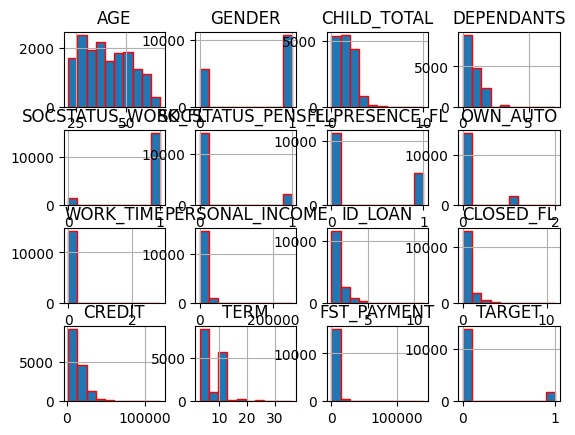

In [ ]:
all_data.hist(edgecolor='r')